In [ ]:
!pip install -r requirements.txt
!pip install requests




In [2]:
%load_ext autoreload
%autoreload 2
from downloader import download_files


In [5]:
class Arg():
    def __init__(self,contains,endings,max_file_size=1):
        # This is used as the args that were passed by cmd in original code. 
        # based on https://github.com/apple/ml-hypersim/tree/main/contrib/99991 
        """Contains: mandatory list of strings that must ALL appear in file name to be downloaded
            endings: list of strings where at least ONE should appear in file name to be downloaded
            max_file_size: max size given in GO"""
        self.directory="downloads" # Download path
        self.overwrite=False
        self.contains=contains # [['ai_001_001'], ['frame.0000']]
        self.scene=None
        self.silent=True
        self.list=False
        self.endings=endings
        self.file_size_limit=max_file_size*(10**9)*10**9 # TODO: planned feature, "works" but first downloads the color images, then fina¨
                                                         # if enough space downloads the corresponding segmentations. For the expected behaviour we would need to rewrite the downloader.py 
        

In [6]:
# Be carefull, running this cell will start the download of ai_001_001. after around 1 mins (depending on connection), you should manually stop this cell as 
# otherwise it can take quite a while. I will try to see how to handle this from python but it doesn't seem trivial.
# Also a planned feature would be to add a limit
args = Arg(contains=[['ai_001_001'], ['frame.0000']],endings=[[".color.hdf5"],[".semantic"]],max_file_size=1) # For now we allow previews, but will be removed for final code.
# args = Arg(contains=[['ai_001_001']],endings=[[".color.hdf5"],[".semantic"]],max_file_size=0.05) 
download_files(args)

Downloading:downloads/ai_001_001/images/scene_cam_00_final_hdf5/frame.0000.color.hdf5 , filesize:3263738
Currently downloaded 0.003263738/1000000000.0 GB
Downloading:downloads/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0000.semantic.hdf5 , filesize:17333
Currently downloaded 0.003281071/1000000000.0 GB
Downloading:downloads/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0000.semantic_instance.hdf5 , filesize:17236
Currently downloaded 0.003298307/1000000000.0 GB
Downloading:downloads/ai_001_001/images/scene_cam_00_geometry_preview/frame.0000.semantic.png , filesize:17691
Currently downloaded 0.003315998/1000000000.0 GB
Downloading:downloads/ai_001_001/images/scene_cam_00_geometry_preview/frame.0000.semantic_instance.png , filesize:16278
Currently downloaded 0.003332276/1000000000.0 GB


KeyboardInterrupt: 

In [7]:
import numpy as np
import h5py

In [8]:
filename = "./downloads/ai_001_001/images/scene_cam_00_final_hdf5/frame.0000.color.hdf5"
f = h5py.File(filename, "r")

In [9]:
filename_semantics = "./downloads/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0000.semantic.hdf5"
f_semantics = h5py.File(filename_semantics, "r")

In [10]:
data = np.array(f["dataset"])
data= data * int(255/data.max() )
data = data.astype(np.uint8)

data_sem = np.array(f_semantics["dataset"])
data_sem= data_sem * int(254/data_sem.max() )
data_sem = data_sem.astype(np.uint8)

In [22]:
print(f"Data information:\t    data.shape:{data.shape} , data.dtype: {data.dtype},data.min:{data.min()},data.max:{data.max()}  ")
print(f"Semantic Data information:  data_sem.shape:{data_sem.shape} ,data_sem.dtype: {data_sem.dtype},data_sem.min:{data_sem.min()},data_sem.max:{data_sem.max()}  ")


Data information:	    data.shape:(768, 1024, 3) , data.dtype: uint8,data.min:0,data.max:254  
Semantic Data information:  data_sem.shape:(768, 1024) ,data_sem.dtype: uint8,data_sem.min:6,data_sem.max:250  


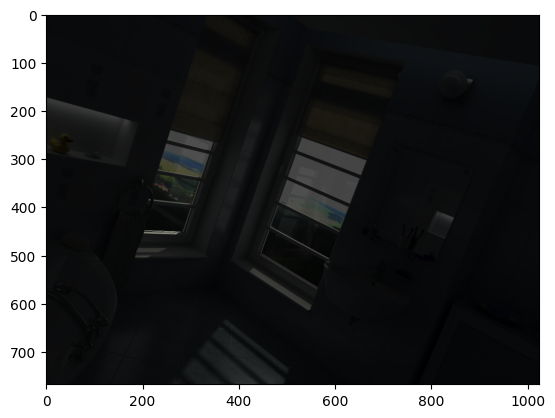

In [11]:
from matplotlib import pyplot as plt
plt.imshow(data)
plt.show()

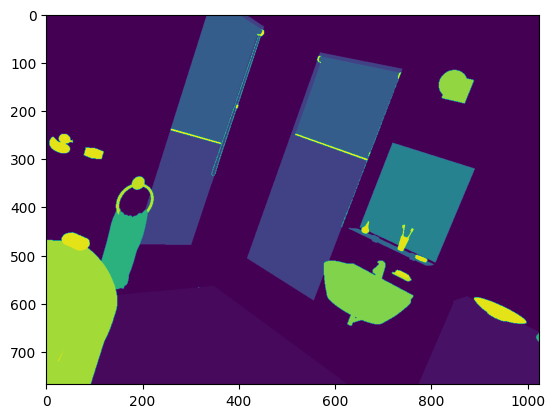

In [12]:
from matplotlib import pyplot as plt
plt.imshow(data_sem)
plt.show()

In [12]:


t = np.array(f_semantics["dataset"])
t.min()
t.max()

40

In [13]:
print(t.min())
print(t.max())

-1
40
